## Imports

In [3]:
# Pandas is an open source data analysis and manipulation tool
import pandas as pd
# library to create visualizations
import seaborn as sns
# library to create visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import timedelta


from statsmodels.tsa.stattools import grangercausalitytests

## Load DataFrame

In [7]:
path = "C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/DataFrames/"

# load exploded
fileName_exploded ="Occurence_DataFrame.csv"
Occurence_DF = pd.read_csv(path+fileName_exploded, index_col=None,header=0)
Occurence_DF["date"] = pd.to_datetime(Occurence_DF["date"], format='%Y-%m-%d')

keyWord_DF = pd.read_csv(path+"keyWords.csv", index_col=None,header=0)

Occurence_DF.info()

Occurence_DF_Bild = pd.read_csv(path+"Occurence_DataFrame_Bild.csv", index_col=None,header=0)
Occurence_DF_Bild["date"] = pd.to_datetime(Occurence_DF_Bild["date"], format='%Y-%m-%d')

Google_DF = pd.read_csv(path+"Google_DataFrame.csv", index_col=None,header=0)
Google_DF["date"] = pd.to_datetime(Google_DF["date"], format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296883 entries, 0 to 296882
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   KeyWord                                       296883 non-null  object        
 1   date                                          296883 non-null  datetime64[ns]
 2   Occurence_in_News                             296883 non-null  int64         
 3   normalized_Occurence_in_News                  296883 non-null  float64       
 4   Occurence_in_Google                           296883 non-null  int64         
 5   normalized_Occurence_in_Google                296883 non-null  float64       
 6   Occurence_in_Wikipedia                        296883 non-null  int64         
 7   normalized_Occurence_in_Wikipedia             296883 non-null  float64       
 8   smoothened_normalized_Occurence_in_News       296883 n

In [10]:
keyWord_DF.sort_values(ascending=False,by="Occurence").reset_index()

,index,KeyWord,Occurence
0,96311,Ukraine,3542
1,71457,Polizei,2679
2,25935,Euro,2629
3,58507,Mann,2605
4,51841,Krieg,2171
...,...,...,...
108979,47585,Karussellpferd,1
108980,47579,Kartograph,1
108981,47578,Kartograf,1
108982,47577,Kartoffelzüchter,1


## Smoothing Timeseries

In [28]:
def smoothen_timeseries(dataframe):
    df = dataframe.copy()
    window_size = 3
    normalized_Occurence_column_names = ["normalized_Occurence_in_News","normalized_Occurence_in_Google",
                                         "normalized_Occurence_in_Wikipedia"]
    Occurence_column_names = ["Occurence_in_News","Occurence_in_Google","Occurence_in_Wikipedia"]

    Column_names = normalized_Occurence_column_names + Occurence_column_names

    for column_name in Column_names:
        # smoothing Occurence

        data = df[column_name].rolling(window_size).mean().fillna(0)
        dataframe["smoothened_"+column_name] = data
    return dataframe



## Plotting "Andreas Scheuer" timeseries from Google

In [8]:
scheuer_df = Google_DF.loc[Google_DF["KeyWord"] == "scheuer"]
scheuer_df

,KeyWord,date,Occurence_in_Google,normalized_Occurence_in_Google


## Finding viral keywords
Finding viral keywords by looking at the diff

If the diff is higher than 15 in one day =viral

In [62]:
virals = Occurence_DF.copy()
virals["diff"] = Occurence_DF.groupby("KeyWord")["Occurence_in_News"].diff()
df_mask=virals['diff']>=15
virals = virals[df_mask]
virals

,KeyWord,date,Occurence_in_News,normalized_Occurence_in_News,Occurence_in_Google,normalized_Occurence_in_Google,Occurence_in_Wikipedia,normalized_Occurence_in_Wikipedia,smoothened_normalized_Occurence_in_News,smoothened_normalized_Occurence_in_Google,smoothened_normalized_Occurence_in_Wikipedia,smoothened_Occurence_in_News,smoothened_Occurence_in_Google,smoothened_Occurence_in_Wikipedia,diff
1261,Zwei,2022-01-31,26,1.000000,100,1.00,100,0.224719,0.435897,0.826667,0.170787,11.333333,82.666667,76.000000,20.0
4804,Polizei,2022-01-20,31,0.939394,37,0.37,400,0.207039,0.646465,0.350000,0.216184,21.333333,35.000000,417.666667,18.0
4824,Polizei,2022-02-09,24,0.727273,36,0.36,371,0.192029,0.515152,0.373333,0.190476,17.000000,37.333333,368.000000,16.0
4893,Polizei,2022-04-19,29,0.878788,31,0.31,371,0.192029,0.464646,0.263333,0.151484,15.333333,26.333333,292.666667,22.0
4916,Polizei,2022-05-12,33,1.000000,38,0.38,298,0.154244,0.595960,0.366667,0.164769,19.666667,36.666667,318.333333,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253592,Invasion,2022-02-24,22,1.000000,100,1.00,618,1.000000,0.454545,0.436667,0.641855,10.000000,43.666667,396.666667,19.0
282166,G7,2022-06-26,19,1.000000,83,0.83,80864,1.000000,0.508772,0.450000,0.469921,9.666667,45.000000,37999.666667,16.0
291386,Ylenia,2022-02-17,42,1.000000,100,1.00,281,1.000000,0.373016,0.450000,0.395018,15.666667,45.000000,111.000000,37.0
292078,Zeynep,2022-02-18,29,0.644444,100,1.00,3105,0.843750,0.274074,0.573333,0.360960,12.333333,57.333333,1328.333333,21.0


## Plotting viral keywords

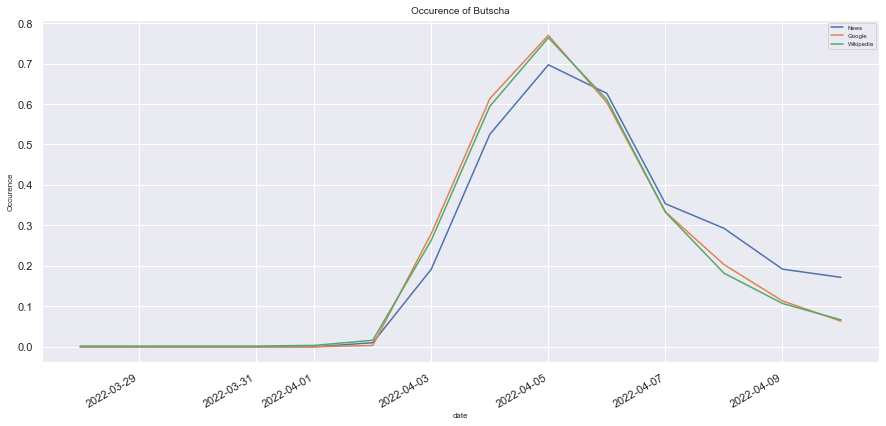

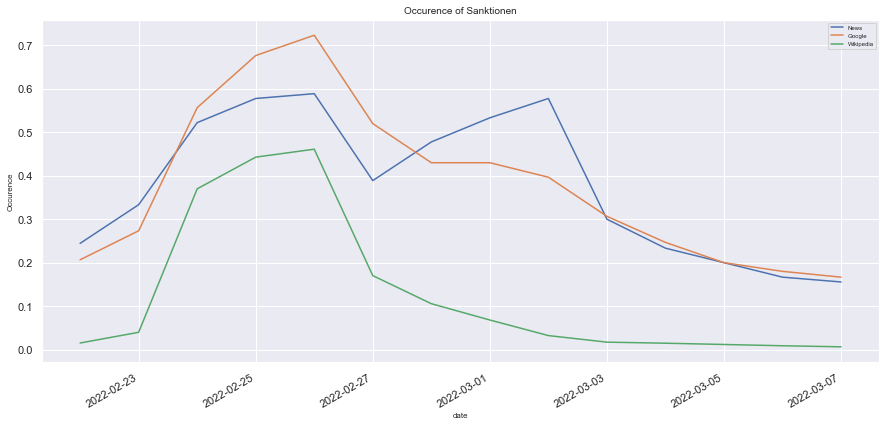

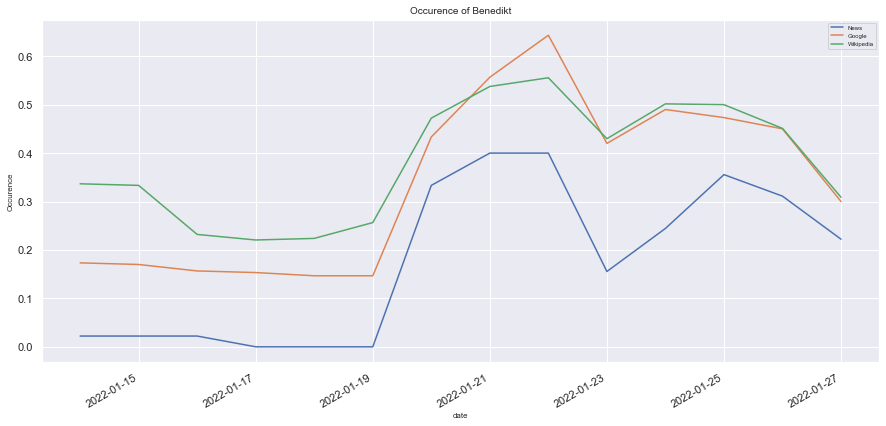

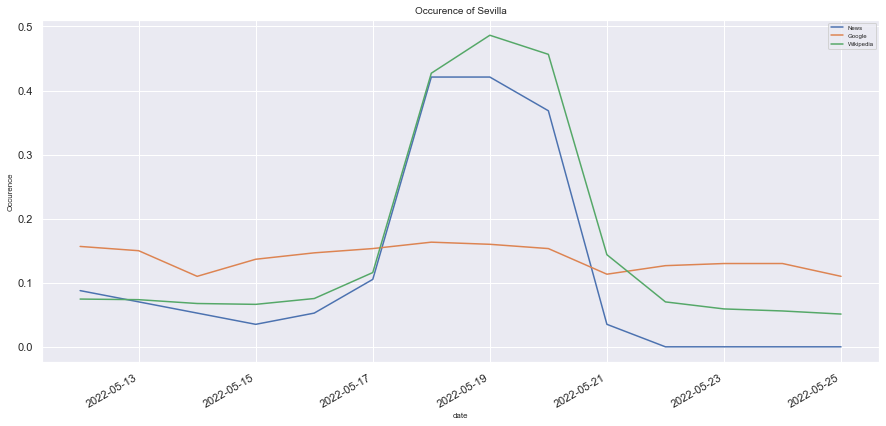

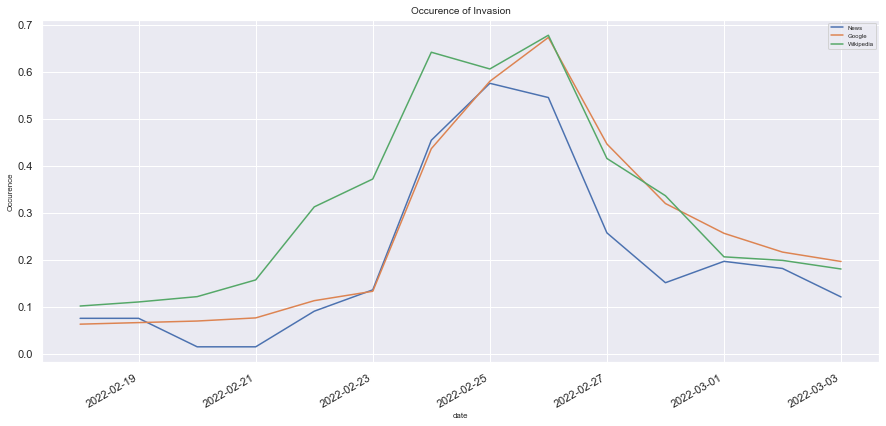

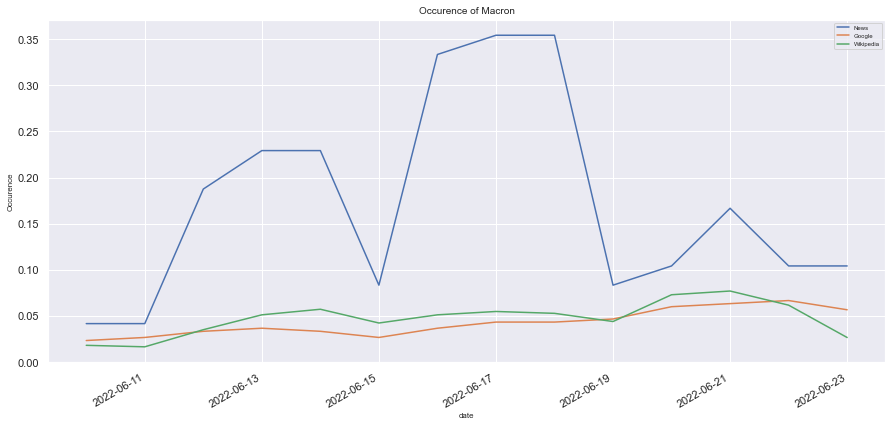

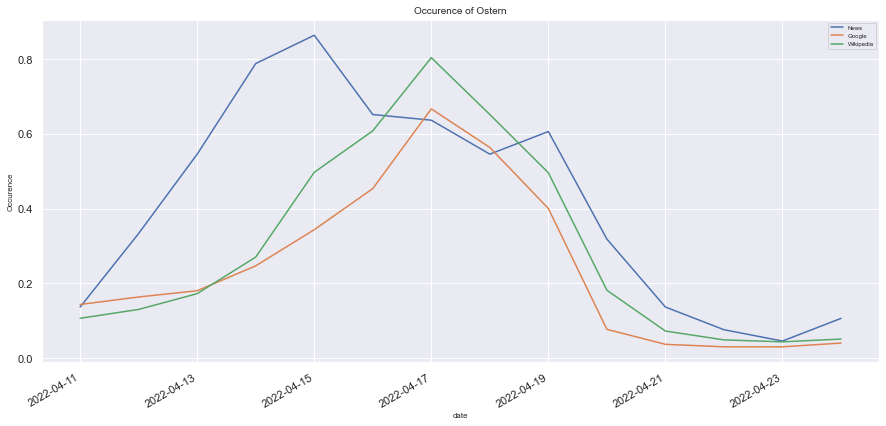

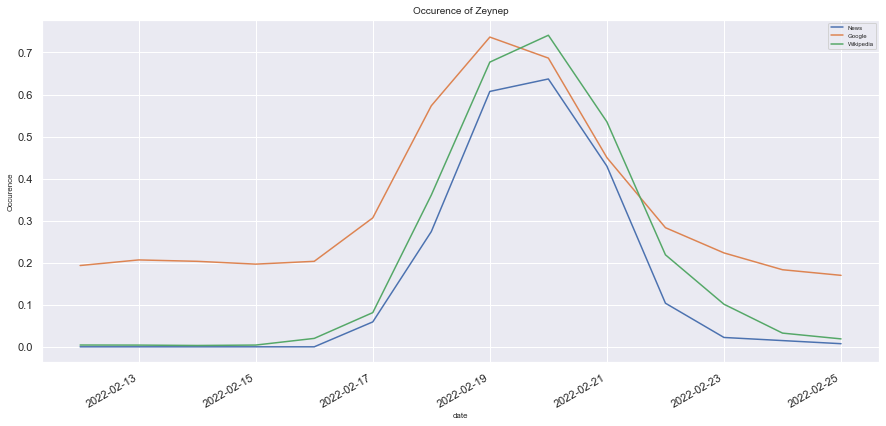

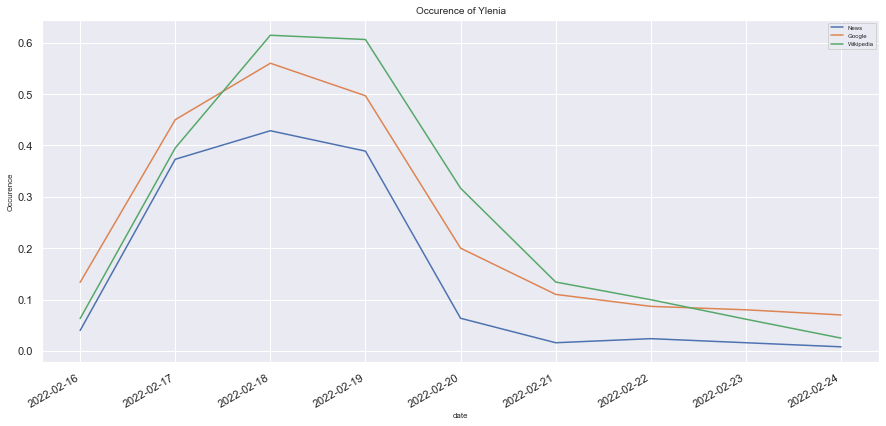

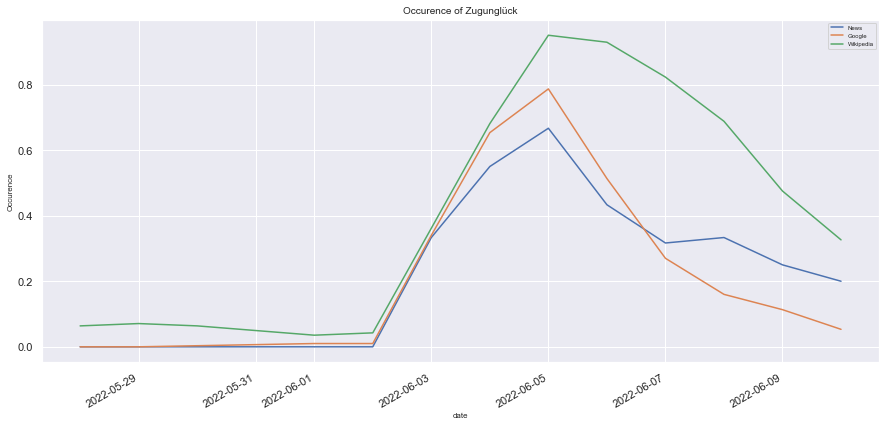

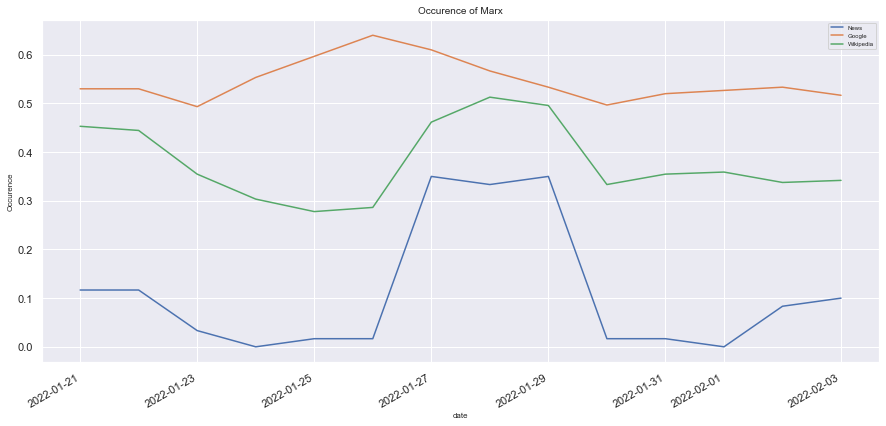

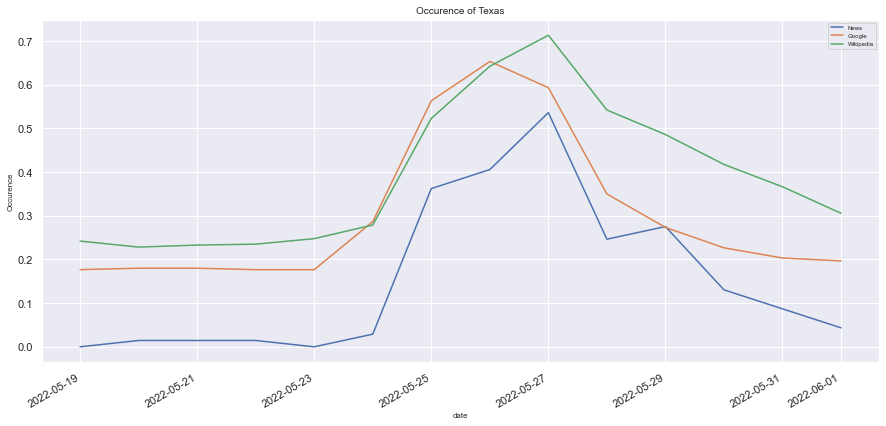

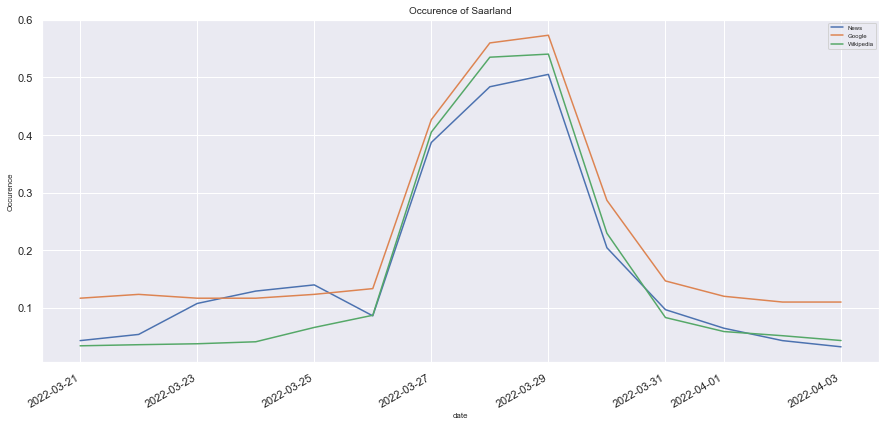

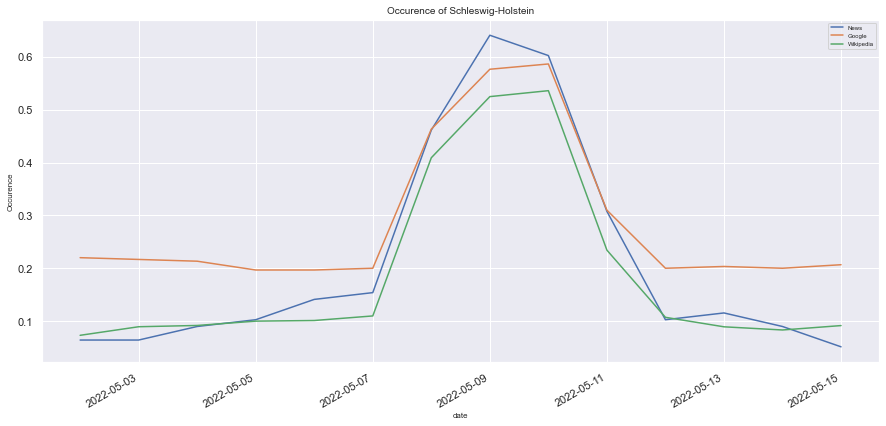

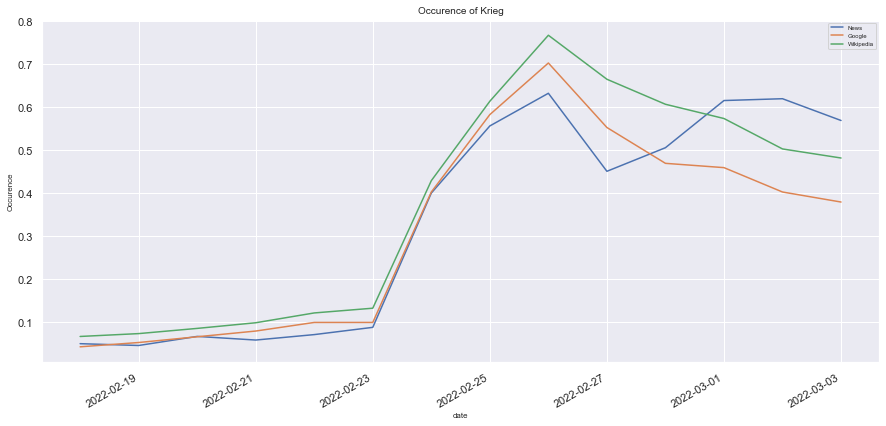

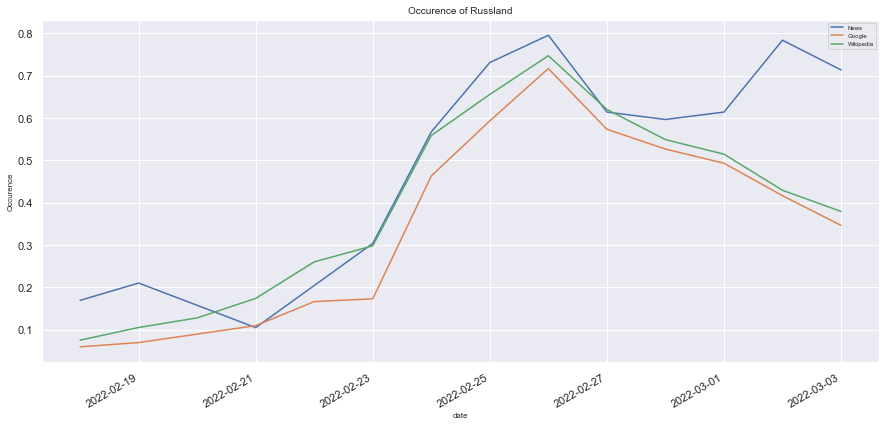

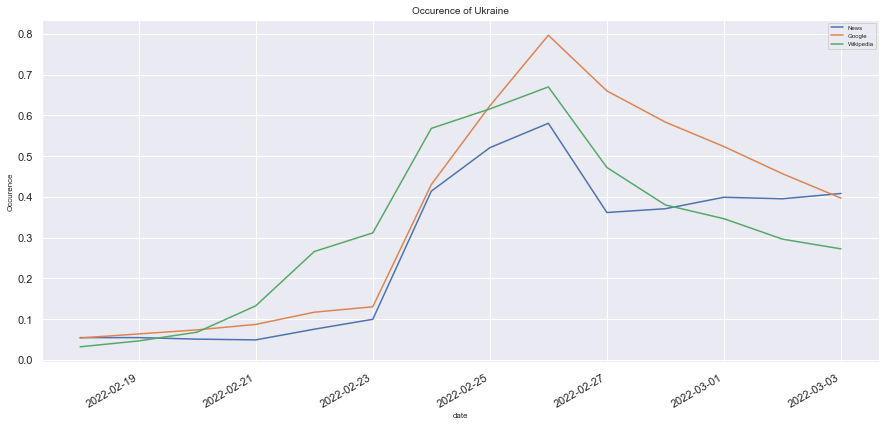

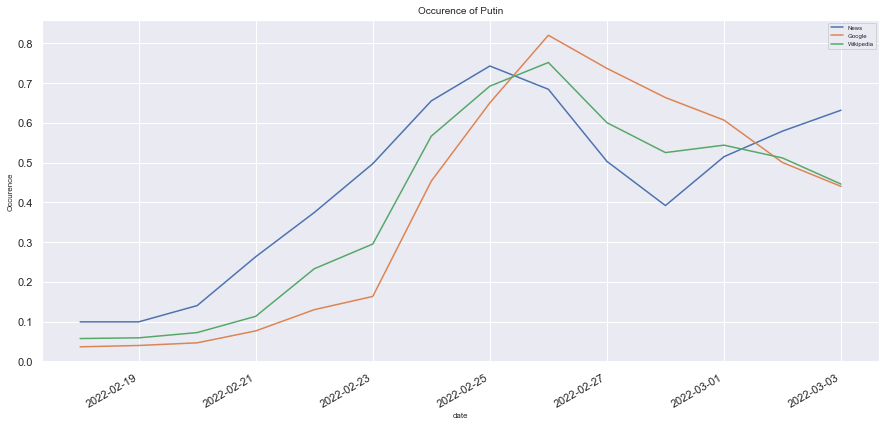

In [83]:
viral_keyWords = {"Butscha":pd.to_datetime("2022-04-03"),"Sanktionen":pd.to_datetime("2022-02-28"),"Benedikt":pd.to_datetime("2022-01-20"),"Sevilla":pd.to_datetime("2022-05-18"),"Invasion":pd.to_datetime("2022-02-24"), "Macron":pd.to_datetime("2022-06-16"),"Ostern":pd.to_datetime("2022-04-17"), "Zeynep": pd.to_datetime("2022-02-18") , "Ylenia": pd.to_datetime("2022-02-17"), "Zugunglück": pd.to_datetime("2022-06-03"), "Marx": pd.to_datetime("2022-01-27"), "Texas": pd.to_datetime("2022-05-25"), "Saarland": pd.to_datetime("2022-03-27"), "Schleswig-Holstein": pd.to_datetime("2022-05-08"),"Krieg":pd.to_datetime("2022-02-24"),"Russland":pd.to_datetime("2022-02-24"),"Ukraine":pd.to_datetime("2022-02-24"),"Putin":pd.to_datetime("2022-02-24")}
for keyWord, date in viral_keyWords.items():
    start_date = date - timedelta(days=7)
    end_date = date + timedelta(days=7)


    keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == keyWord]

    mask = (keyWord_of_interest_df['date'] > start_date) & (keyWord_of_interest_df['date'] <= end_date)
    keyWord_of_interest_df = keyWord_of_interest_df.loc[mask]
    plt.figure()

    ax = sns.lineplot(data=keyWord_of_interest_df,x="date",y="smoothened_normalized_Occurence_in_News")
    ax1 = sns.lineplot(data=keyWord_of_interest_df,x="date",y="smoothened_normalized_Occurence_in_Google")
    ax2 = sns.lineplot(data=keyWord_of_interest_df,x="date",y="smoothened_normalized_Occurence_in_Wikipedia")
    plt.legend(labels = ["News","Google","Wikipedia"],fontsize=6)
    plt.title(f"Occurence of {keyWord}",fontsize=10)
    plt.ylabel('Occurence', fontsize=8);
    plt.xlabel('date', fontsize=8);
    plt.gcf().autofmt_xdate()
    sns.set(rc={'figure.figsize':(15,7)})
    save_fig(ax,f"Virals/Occurence of {keyWord}")

## Plotting viral keyWords - difference

C:\Users\Jan\AppData\Local\Temp\ipykernel_12884\1576519960.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["diff_news"] = keyWord_of_interest_df.smoothened_normalized_Occurence_in_News.diff()
C:\Users\Jan\AppData\Local\Temp\ipykernel_12884\1576519960.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["diff_Google"] = keyWord_of_interest_df.smoothened_normalized_Occurence_in_Google.diff()
C:\Users\Jan\AppData\Local\Temp\ipykernel_12884\1576519960.py:11: Set

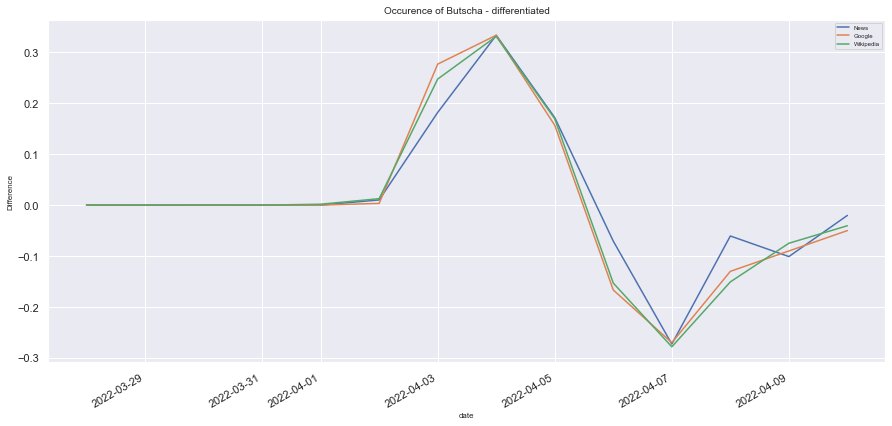

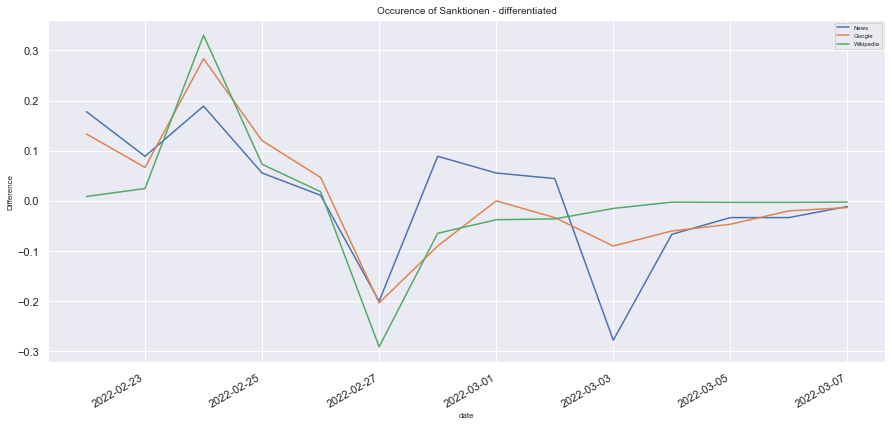

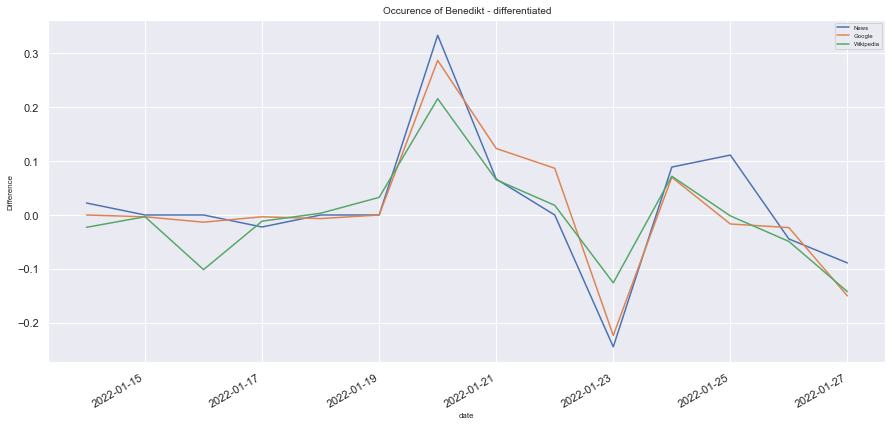

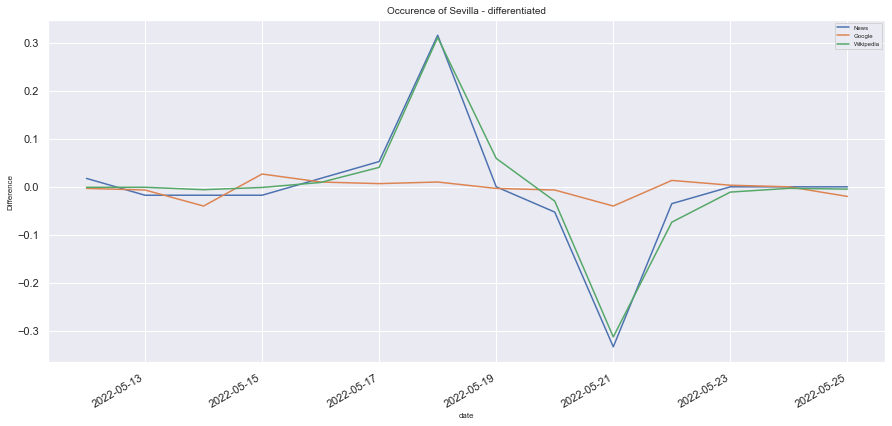

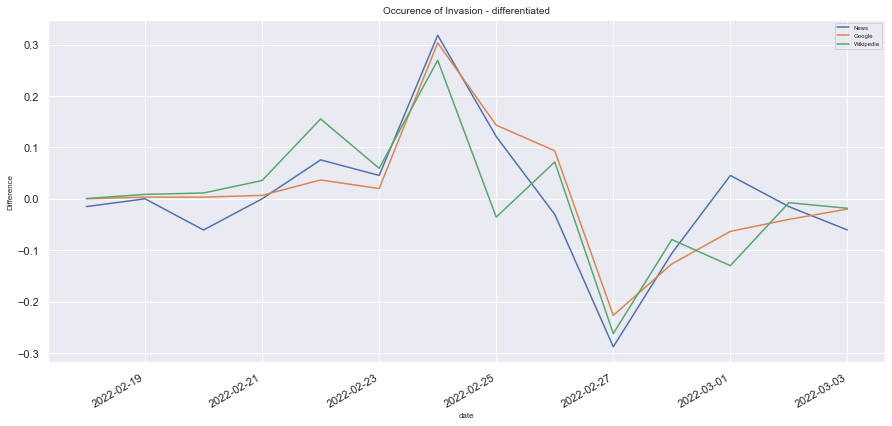

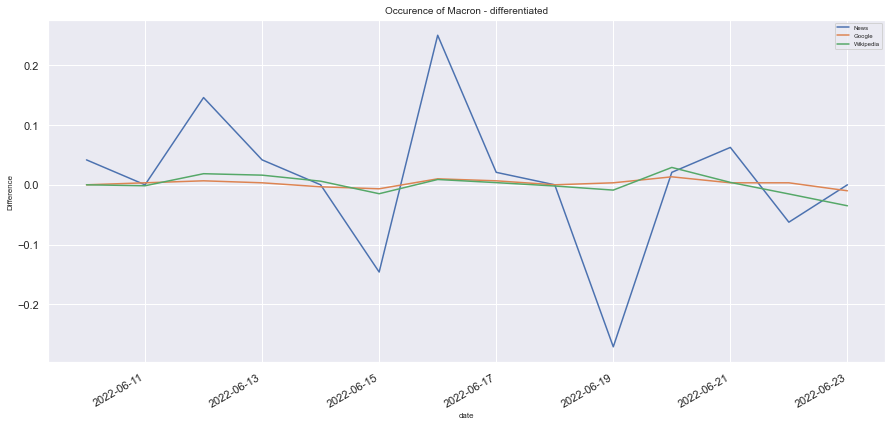

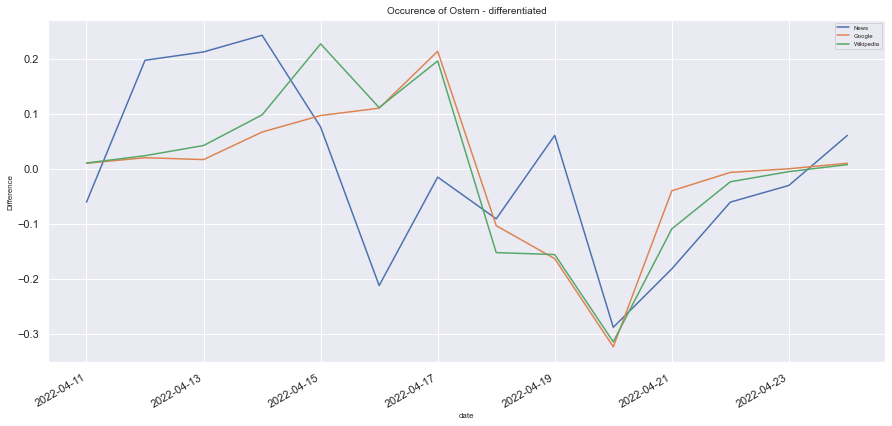

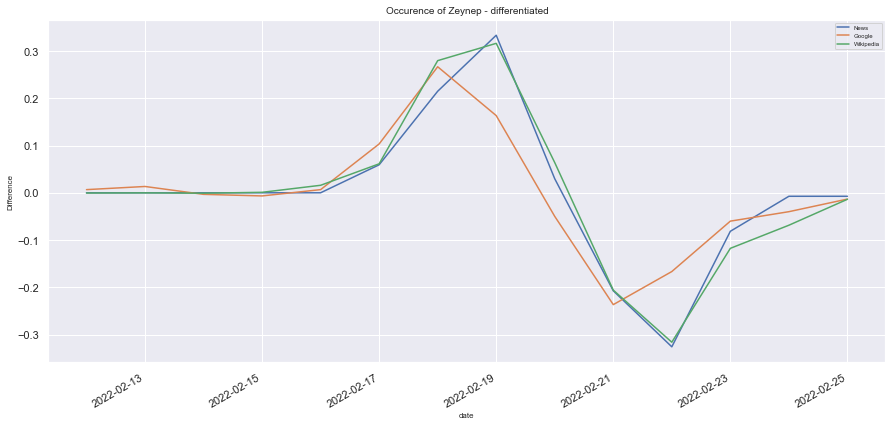

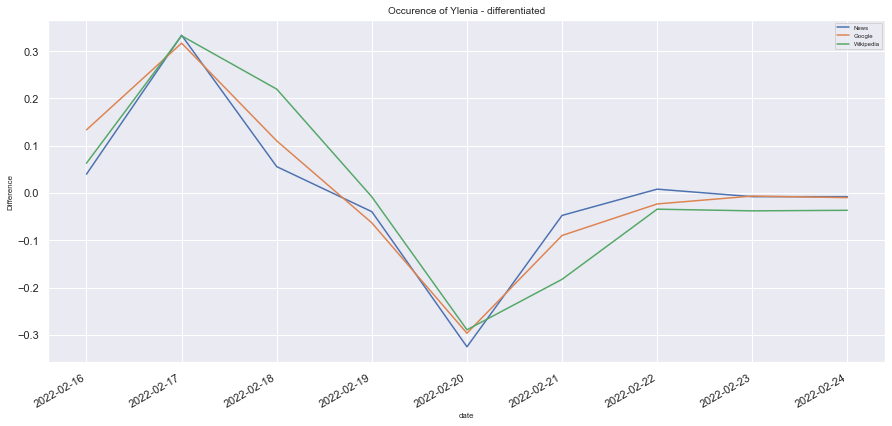

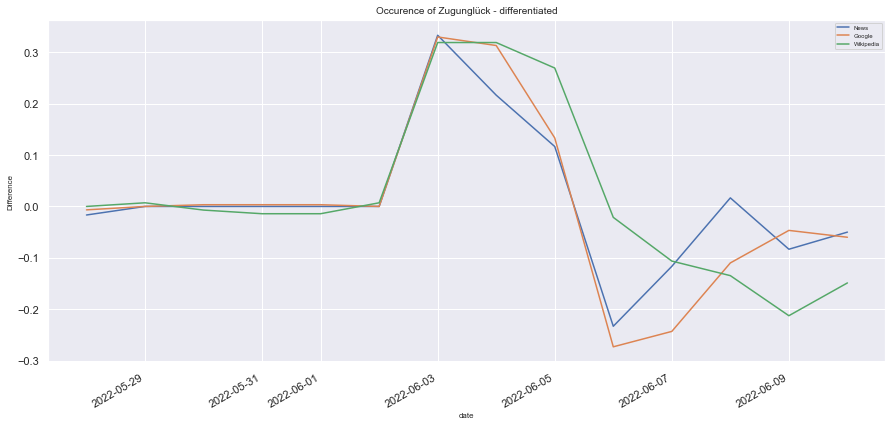

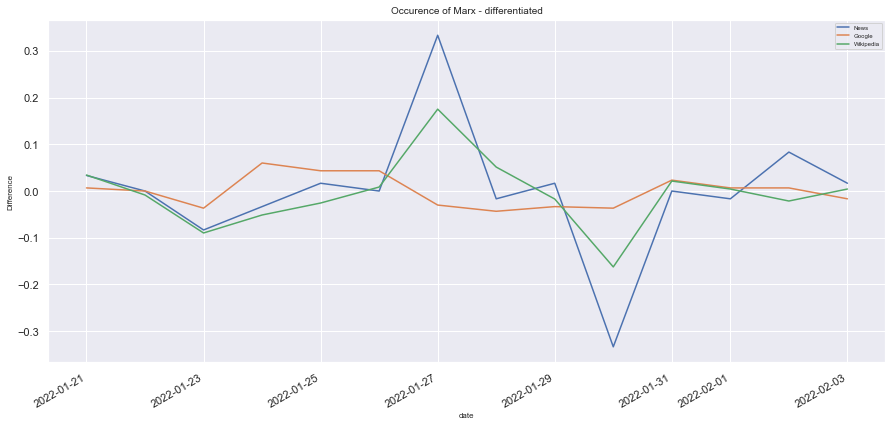

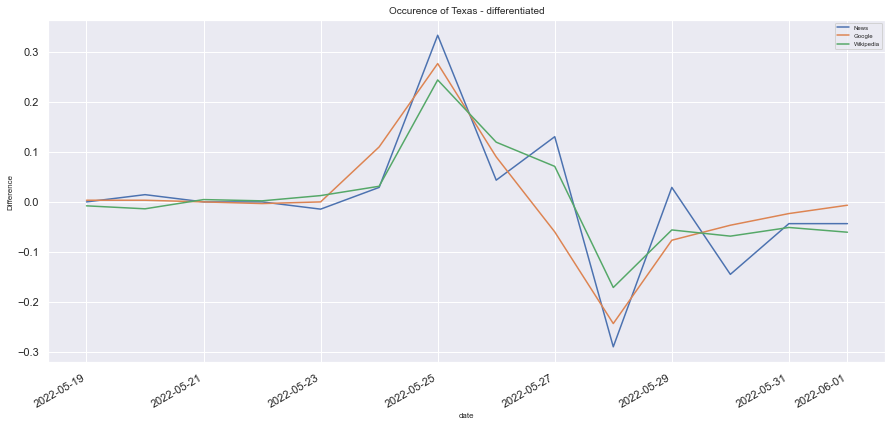

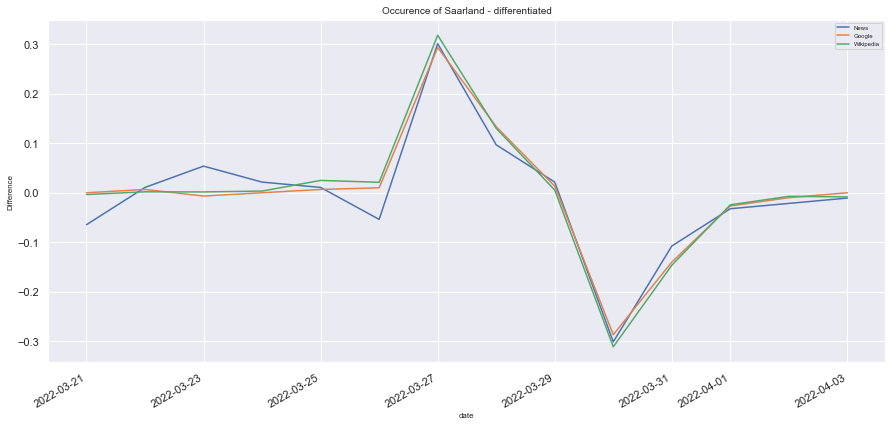

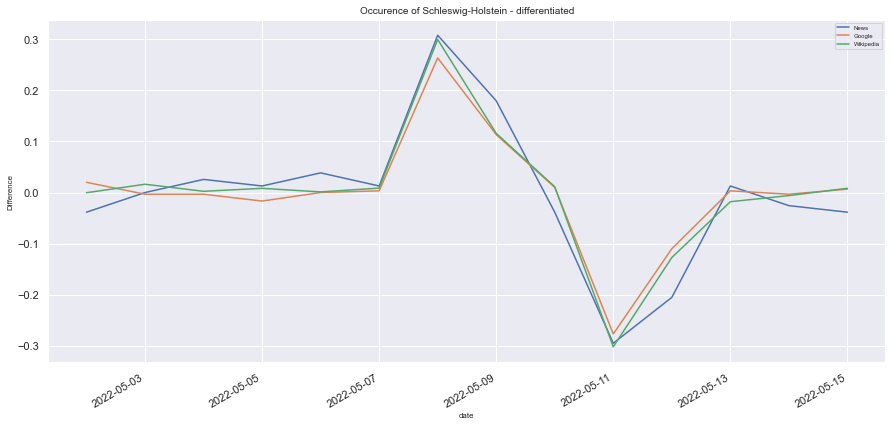

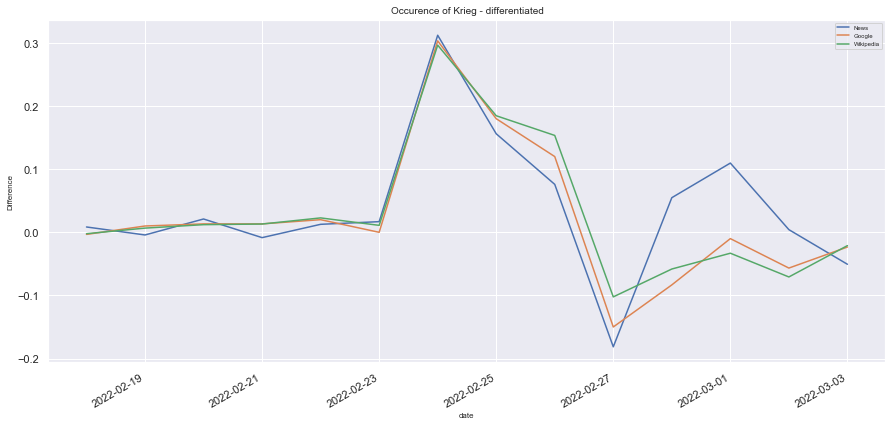

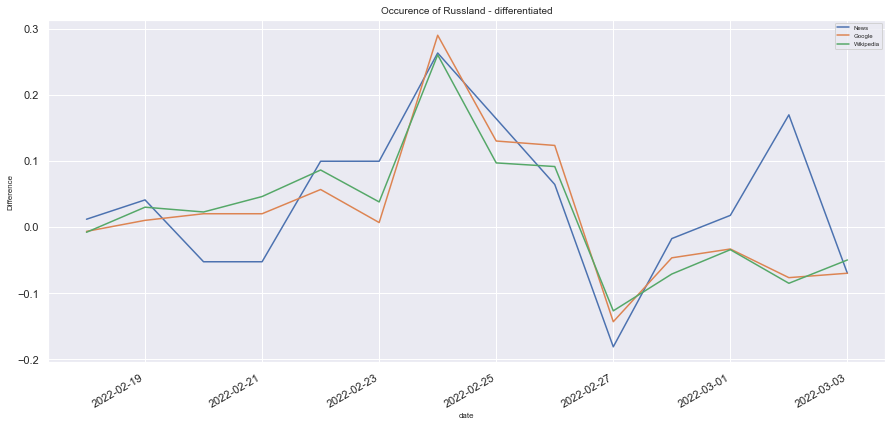

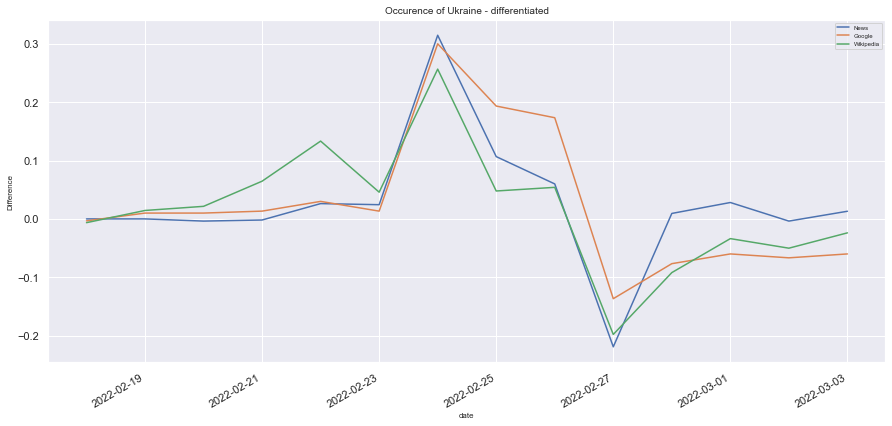

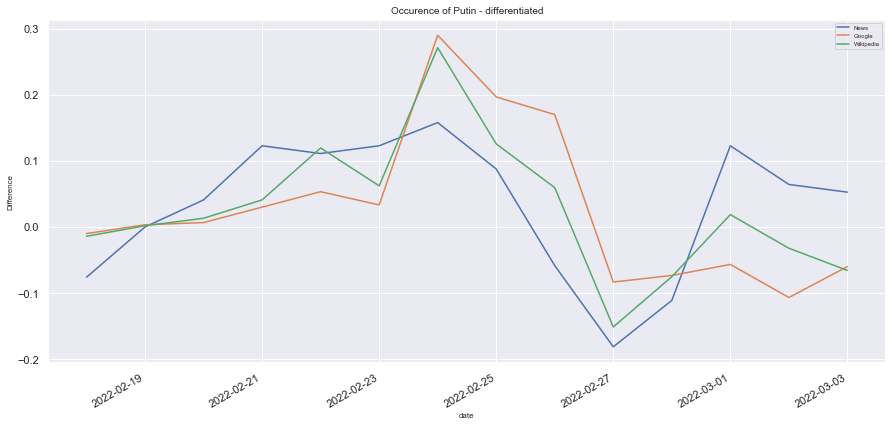

In [82]:
viral_keyWords = {"Butscha":pd.to_datetime("2022-04-03"),"Sanktionen":pd.to_datetime("2022-02-28"),"Benedikt":pd.to_datetime("2022-01-20"),"Sevilla":pd.to_datetime("2022-05-18"),"Invasion":pd.to_datetime("2022-02-24"), "Macron":pd.to_datetime("2022-06-16"),"Ostern":pd.to_datetime("2022-04-17"), "Zeynep": pd.to_datetime("2022-02-18") , "Ylenia": pd.to_datetime("2022-02-17"), "Zugunglück": pd.to_datetime("2022-06-03"), "Marx": pd.to_datetime("2022-01-27"), "Texas": pd.to_datetime("2022-05-25"), "Saarland": pd.to_datetime("2022-03-27"), "Schleswig-Holstein": pd.to_datetime("2022-05-08"),"Krieg":pd.to_datetime("2022-02-24"),"Russland":pd.to_datetime("2022-02-24"),"Ukraine":pd.to_datetime("2022-02-24"),"Putin":pd.to_datetime("2022-02-24")}
for keyWord, date in viral_keyWords.items():
    start_date = date - timedelta(days=7)
    end_date = date + timedelta(days=7)


    keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == keyWord]

    keyWord_of_interest_df["diff_news"] = keyWord_of_interest_df.smoothened_normalized_Occurence_in_News.diff()
    keyWord_of_interest_df["diff_Google"] = keyWord_of_interest_df.smoothened_normalized_Occurence_in_Google.diff()
    keyWord_of_interest_df["diff_Wikipedia"] = keyWord_of_interest_df.smoothened_normalized_Occurence_in_Wikipedia.diff()
    mask = (keyWord_of_interest_df['date'] > start_date) & (keyWord_of_interest_df['date'] <= end_date)
    keyWord_of_interest_df = keyWord_of_interest_df.loc[mask]
    plt.figure()
    ax = sns.lineplot(data=keyWord_of_interest_df,x="date",y="diff_news")
    ax1 = sns.lineplot(data=keyWord_of_interest_df,x="date",y="diff_Google")
    ax2 = sns.lineplot(data=keyWord_of_interest_df,x="date",y="diff_Wikipedia")
    plt.legend(labels = ["News","Google","Wikipedia"],fontsize=6)
    plt.title(f"Occurence of {keyWord} - differentiated",fontsize=10)
    plt.ylabel('Difference', fontsize=8);
    plt.xlabel('date', fontsize=8);
    plt.gcf().autofmt_xdate()

    sns.set(rc={'figure.figsize':(15,7)})
    save_fig(ax,f"Virals/Differential/Occurence of {keyWord} differential")

<AxesSubplot:xlabel='date', ylabel='Occurence_in_News'>

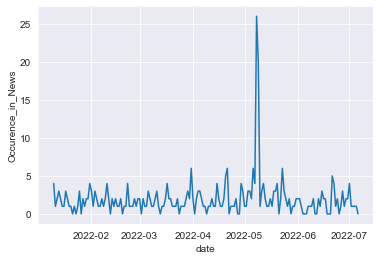

In [34]:
test = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Schleswig-Holstein"] [["date","Occurence_in_News"]]
test["diff"] = test.Occurence_in_News.diff()
sns.lineplot(data=test,x="date",y="Occurence_in_News")

## Moving average example "Lindner"

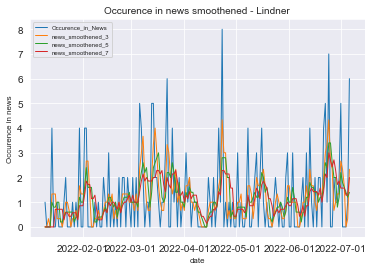

In [15]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Lindner"]

window_sizes=[3,5,7]
smoothened_df = keyWord_of_interest_df.copy()
for window_size in window_sizes:
    smoothened_df[f"news_smoothened_{window_size}"] = smoothened_df["Occurence_in_News"].rolling(window_size).mean().fillna(0)
smoothened_df = smoothened_df[["KeyWord","date","Occurence_in_News","news_smoothened_3","news_smoothened_5","news_smoothened_7"]]




fig, ax = plt.subplots()

ax= sns.lineplot(x='date', y='Occurence_in_News', data=smoothened_df,linewidth=1)
ax1= sns.lineplot(x='date', y='news_smoothened_3', data=smoothened_df,linewidth=1)
ax2= sns.lineplot(x='date', y='news_smoothened_5', data=smoothened_df,linewidth=1)
ax3= sns.lineplot(x='date', y='news_smoothened_7', data=smoothened_df,linewidth=1)

plt.legend(labels=['Occurence_in_News', 'news_smoothened_3', 'news_smoothened_5',"news_smoothened_7"],fontsize=6)

#ax sns.lineplot(data=smoothened_df,dashes = False,linewidth=1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title(f"Occurence in news smoothened - Lindner",fontsize=10)
plt.ylabel('Occurence in news', fontsize=8);
plt.xlabel('date', fontsize=8);

save_fig(ax,f"Occurence in news smoothened Lindner")

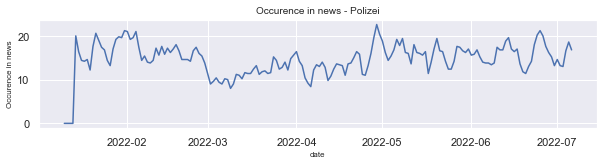

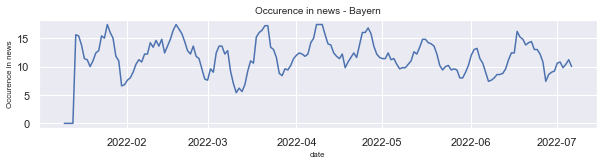

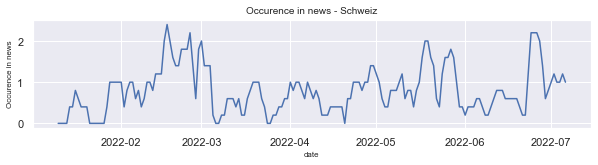

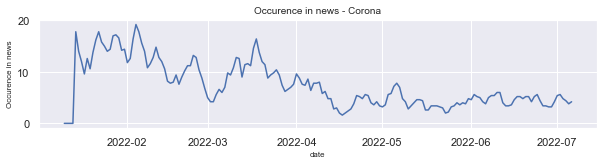

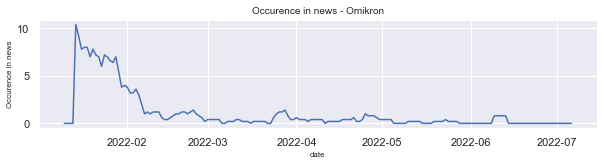

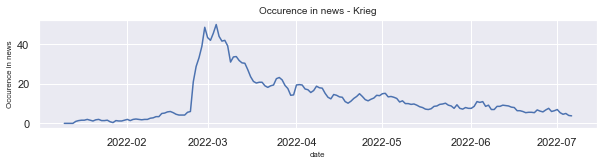

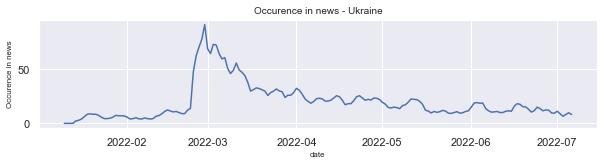

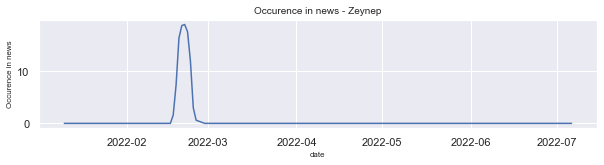

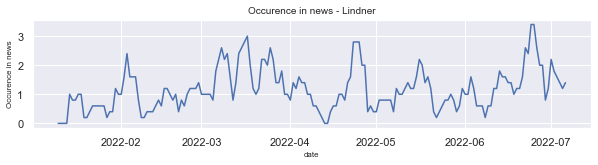

In [19]:
keyWords = ["Polizei","Bayern","Schweiz","Corona","Omikron","Krieg","Ukraine","Zeynep","Lindner"]
for keyWord in keyWords:
    keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == keyWord]
    plt.figure()
    ax = sns.lineplot(data=keyWord_of_interest_df,x="date",y="smoothened_Occurence_in_News")
    plt.title(f"Occurence in news - {keyWord}",fontsize=10)
    plt.ylabel('Occurence in news', fontsize=8);
    plt.xlabel('date', fontsize=8);


    save_fig(ax,f"Occurence in news {keyWord}")

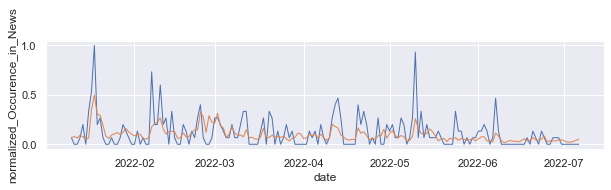

In [16]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Baerbock"]
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


fig, ax = plt.subplots()

ax= sns.lineplot(x='date', y='normalized_Occurence_in_News', data=keyWord_of_interest_df,linewidth=1)
ax1= sns.lineplot(x='date', y='normalized_Occurence_in_Wikipedia', data=keyWord_of_interest_df,linewidth=1)

## Timeseries for "Zeynep"

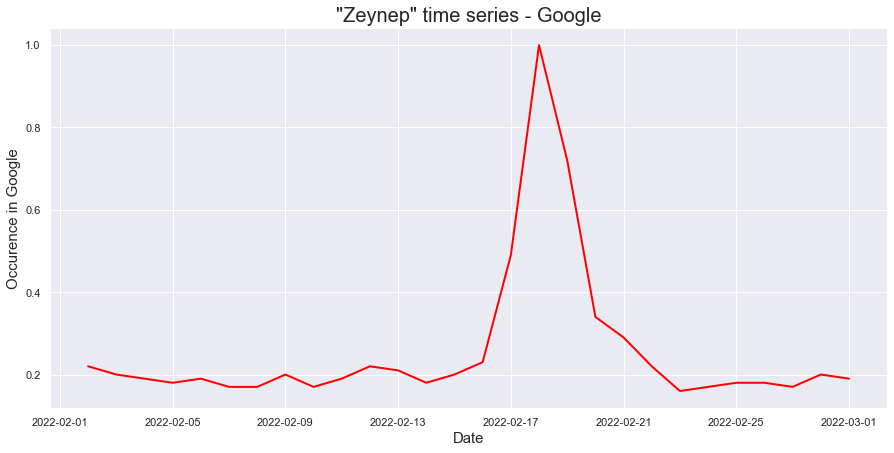

In [58]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Zeynep"]
keyWord_of_interest_df = keyWord_of_interest_df[["KeyWord","date","normalized_Occurence_in_News","normalized_Occurence_in_Google","normalized_Occurence_in_Wikipedia"]]
sns.set(rc={'figure.figsize':(15,7)})

mask = (keyWord_of_interest_df['date'] > "2022-2-1") & (keyWord_of_interest_df['date'] <= "2022-3-1")
keyWord_of_interest_df = keyWord_of_interest_df.loc[mask]
#zeynep_News= sns.lineplot(x='date', y='normalized_Occurence_in_News', data=keyWord_of_interest_df,linewidth=2,color="blue")

#plt.title("\"Zeynep\" time series - News",fontsize=20)
#plt.ylabel('Occurence in News', fontsize=15);
#plt.xlabel('Date', fontsize=15);
#save_fig(zeynep_News,"Zeynep_Time_Series_News")

#plt.figure()

zeynep_Google= sns.lineplot(x='date', y='normalized_Occurence_in_Google', data=keyWord_of_interest_df,linewidth=2,color="red")
zeynep_Google.set(ylabel="Occurence in Google")
zeynep_Google.set(title="\"Zeynep\" time series - Google")

plt.title("\"Zeynep\" time series - Google",fontsize=20)
plt.ylabel('Occurence in Google', fontsize=15);
plt.xlabel('Date', fontsize=15);
sns.set(rc={'figure.figsize':(15,7)})
save_fig(zeynep_Google,"Zeynep_Time_Series_Google")


In [90]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Zeynep"]
keyWord_of_interest_df = keyWord_of_interest_df[["KeyWord","date","normalized_Occurence_in_News","normalized_Occurence_in_Google","normalized_Occurence_in_Wikipedia"]]
sns.set(rc={'figure.figsize':(15,7)})

mask = (keyWord_of_interest_df['date'] > "2022-2-1") & (keyWord_of_interest_df['date'] <= "2022-3-1")
keyWord_of_interest_df = keyWord_of_interest_df.loc[mask]
keyWord_of_interest_df

,KeyWord,date,normalized_Occurence_in_News,normalized_Occurence_in_Google,normalized_Occurence_in_Wikipedia
292062,Zeynep,2022-02-02,0.000000,0.22,0.005163
292063,Zeynep,2022-02-03,0.000000,0.20,0.002174
292064,Zeynep,2022-02-04,0.000000,0.19,0.002717
292065,Zeynep,2022-02-05,0.000000,0.18,0.004076
292066,Zeynep,2022-02-06,0.000000,0.19,0.003261
292067,Zeynep,2022-02-07,0.000000,0.17,0.003804
292068,Zeynep,2022-02-08,0.000000,0.17,0.003261
292069,Zeynep,2022-02-09,0.000000,0.20,0.003533
292070,Zeynep,2022-02-10,0.000000,0.17,0.004348
292071,Zeynep,2022-02-11,0.000000,0.19,0.006522


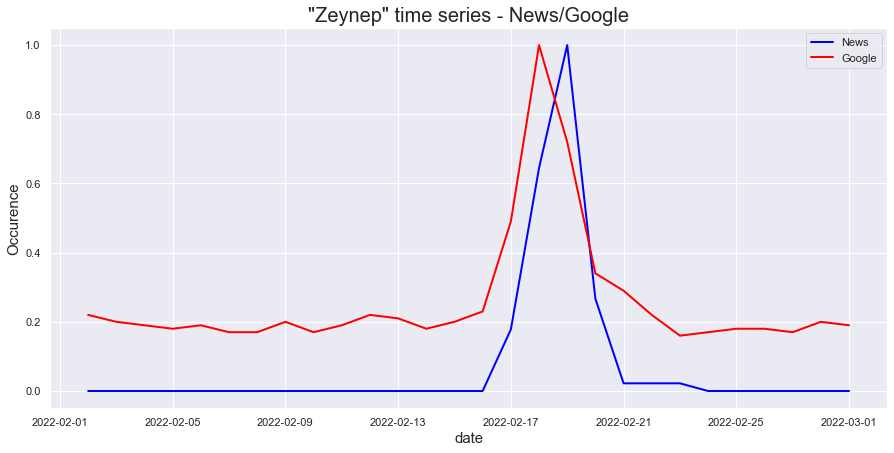

In [61]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Zeynep"]
keyWord_of_interest_df = keyWord_of_interest_df[["KeyWord","date","normalized_Occurence_in_News","normalized_Occurence_in_Google","normalized_Occurence_in_Wikipedia"]]
sns.set(rc={'figure.figsize':(15,7)})

mask = (keyWord_of_interest_df['date'] > "2022-2-1") & (keyWord_of_interest_df['date'] <= "2022-3-1")
keyWord_of_interest_df = keyWord_of_interest_df.loc[mask]

ax = sns.lineplot(x='date', y='normalized_Occurence_in_News', data=keyWord_of_interest_df,linewidth=2,color="blue")
ax = sns.lineplot(x="date",y="normalized_Occurence_in_Google",data=keyWord_of_interest_df,linewidth=2,color="red")


plt.title("\"Zeynep\" time series - News/Google",fontsize=20)
plt.ylabel('Occurence', fontsize=15);
plt.xlabel('date', fontsize=15);
plt.legend(labels=["News","Google"])

save_fig(ax,"Zeynep_Time_Series_News_Google")

## Timeseries for "Netflix"

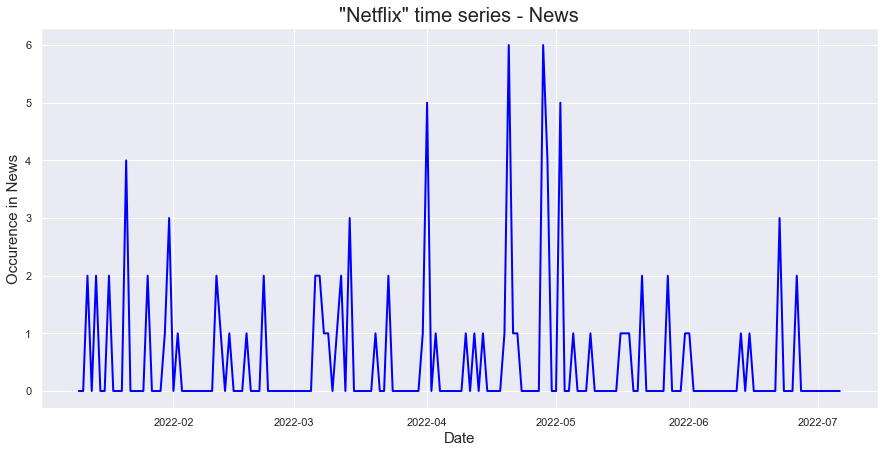

In [69]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Netflix"]
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.lineplot(x='date', y='Occurence_in_News', data=keyWord_of_interest_df,linewidth=2,color="blue")

plt.title("\"Netflix\" time series - News",fontsize=20)
plt.ylabel('Occurence in News', fontsize=15);
plt.xlabel('Date', fontsize=15);

save_fig(ax,"Netflix_Time_Series_News")

## Timeseries for "Netflix"

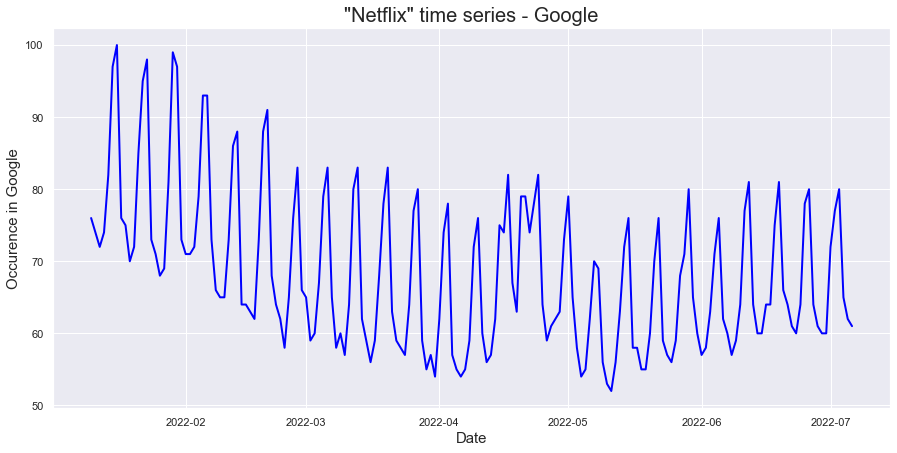

In [80]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Netflix"]
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.lineplot(x='date', y='Occurence_in_Google', data=keyWord_of_interest_df,linewidth=2,color="blue")

plt.title("\"Netflix\" time series - Google",fontsize=20)
plt.ylabel('Occurence in Google', fontsize=15);
plt.xlabel('Date', fontsize=15);

#save_fig(ax,"Netflix_Time_Series_Google")

## Timeseries Netflix combined raw

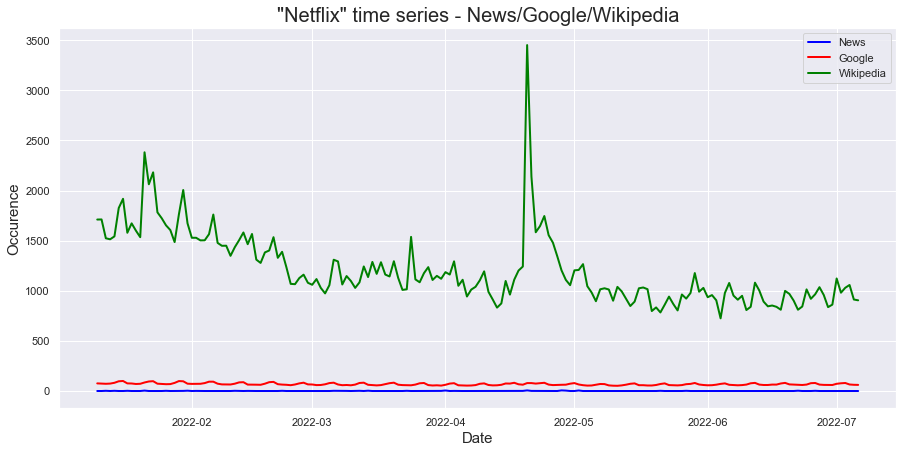

In [78]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Netflix"]
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.lineplot(x='date', y='Occurence_in_News', data=keyWord_of_interest_df,linewidth=2,color="blue")
sns.lineplot(x='date', y='Occurence_in_Google', data=keyWord_of_interest_df,linewidth=2,color="red")
sns.lineplot(x='date', y='Occurence_in_Wikipedia', data=keyWord_of_interest_df,linewidth=2,color="green")


plt.title("\"Netflix\" time series - News/Google/Wikipedia",fontsize=20)
plt.ylabel('Occurence', fontsize=15);
plt.xlabel('Date', fontsize=15);
plt.legend(labels=["News","Google","Wikipedia"])

save_fig(ax,"Netflix_Time_Series_News_Google_Wikipedia")

## Timeseries Netflix combined normalized

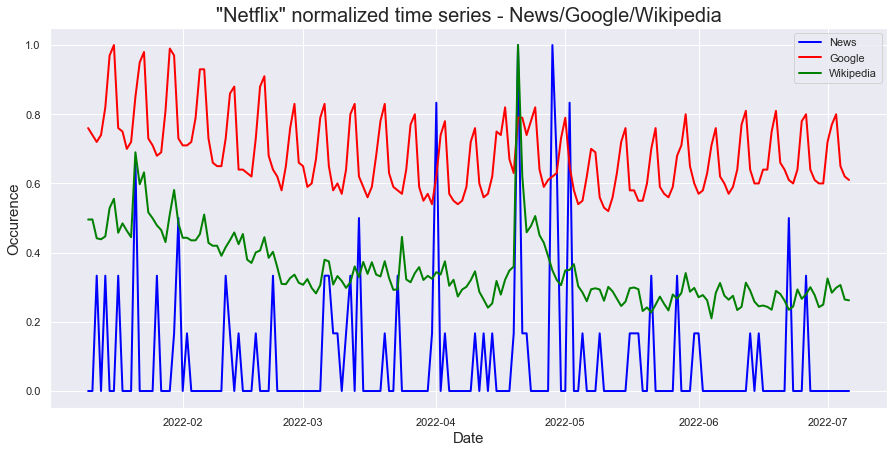

In [79]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Netflix"]
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.lineplot(x='date', y='normalized_Occurence_in_News', data=keyWord_of_interest_df,linewidth=2,color="blue")
sns.lineplot(x='date', y='normalized_Occurence_in_Google', data=keyWord_of_interest_df,linewidth=2,color="red")
sns.lineplot(x='date', y='normalized_Occurence_in_Wikipedia', data=keyWord_of_interest_df,linewidth=2,color="green")


plt.title("\"Netflix\" normalized time series - News/Google/Wikipedia",fontsize=20)
plt.ylabel('Occurence', fontsize=15);
plt.xlabel('Date', fontsize=15);
plt.legend(labels=["News","Google","Wikipedia"])

save_fig(ax,"Netflix_Time_Series_News_Google_Wikipedia_normalized")

## Timeseries Netflix combined normalized smoothened

C:\Users\Jan\AppData\Local\Temp\ipykernel_9644\450481647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["smoothened_"+column_name] = data
C:\Users\Jan\AppData\Local\Temp\ipykernel_9644\450481647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["smoothened_"+column_name] = data
C:\Users\Jan\AppData\Local\Temp\ipykernel_9644\450481647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

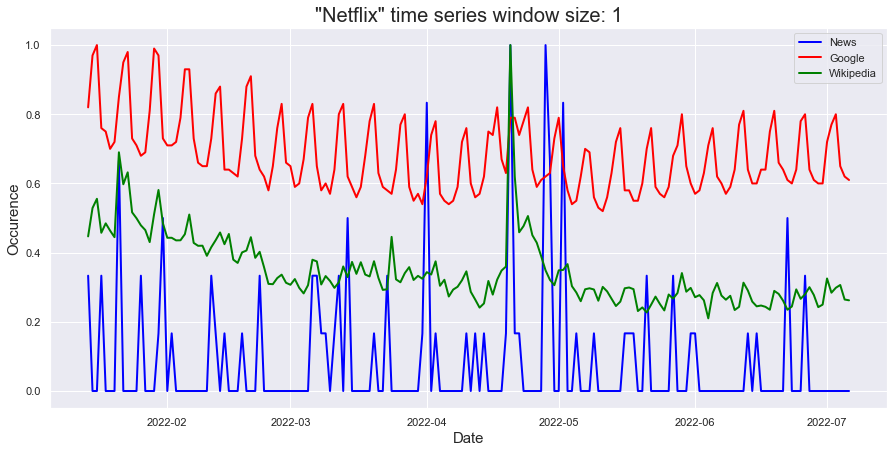

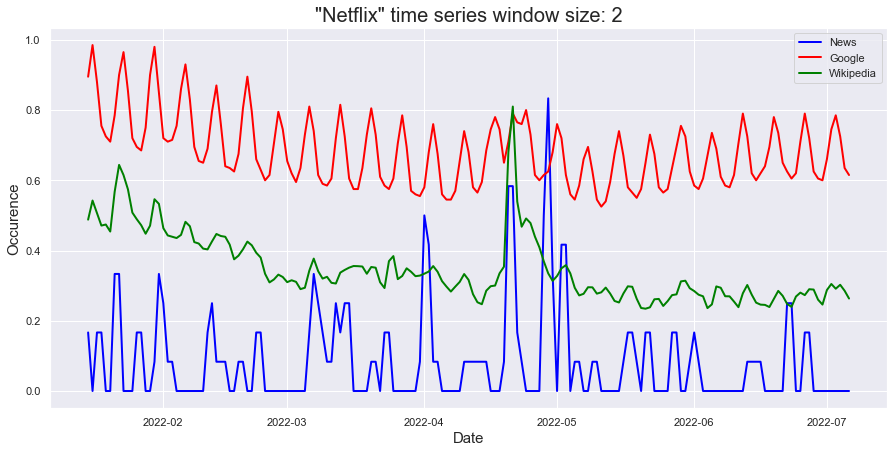

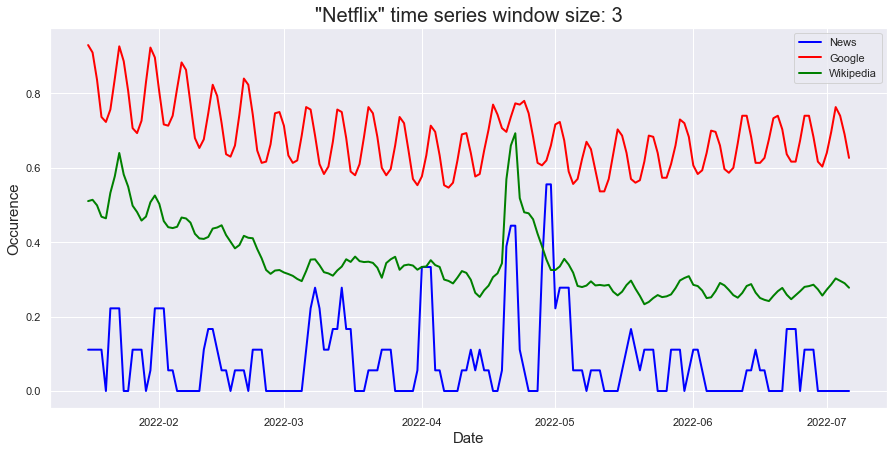

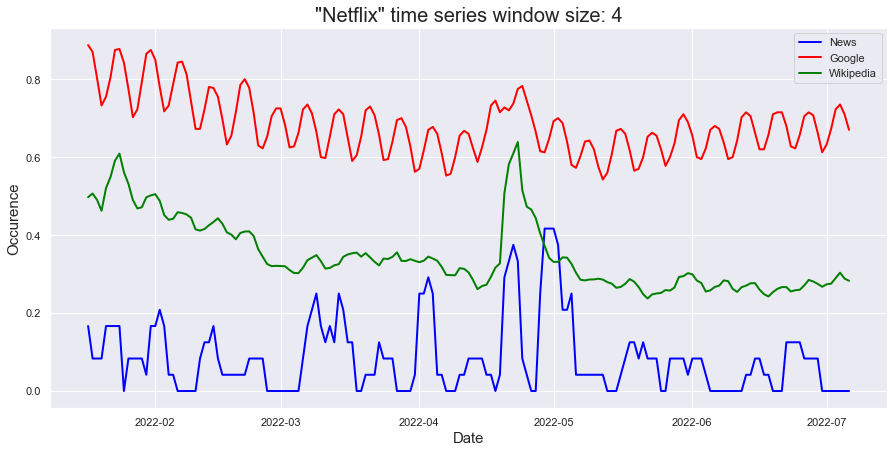

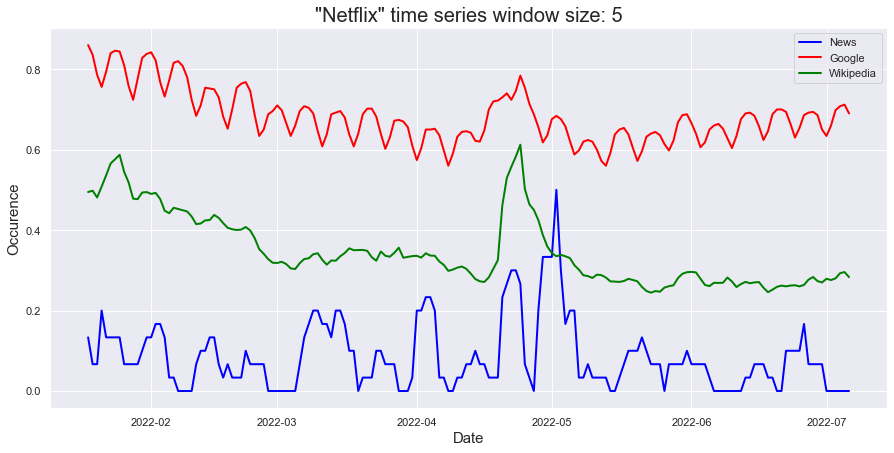

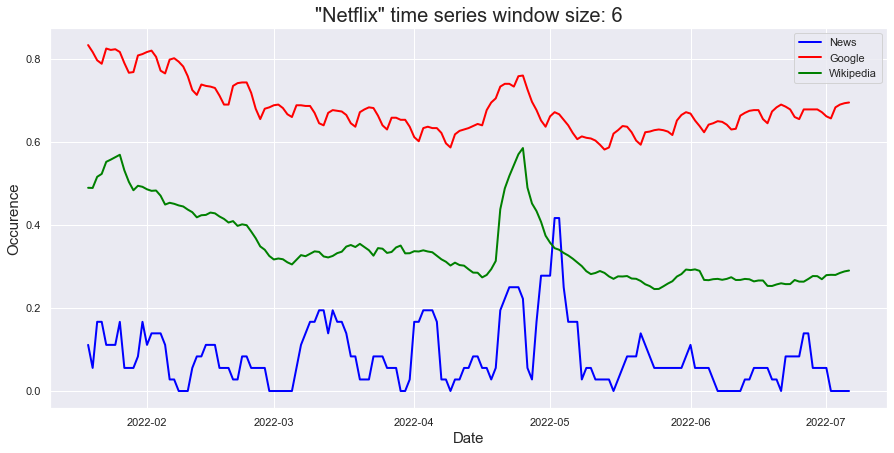

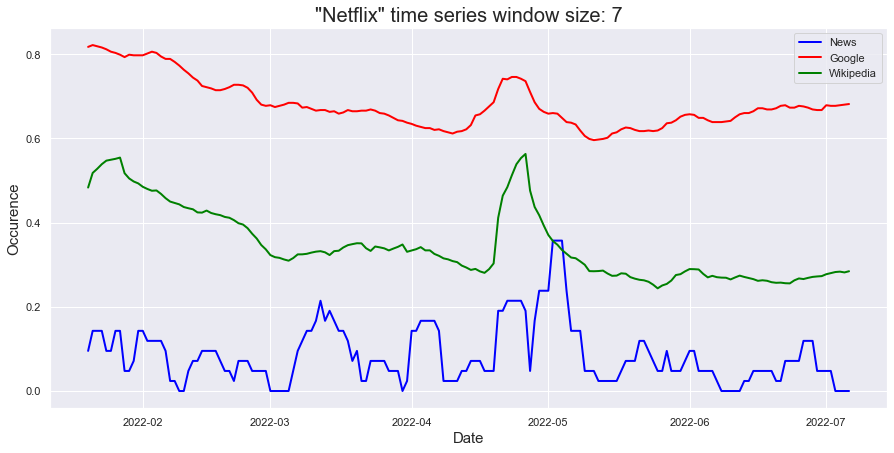

In [110]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Netflix"]
window_sizes = [1,2,3,4,5,6,7]
for window_size in window_sizes:
    sns.set(rc={'figure.figsize':(15,7)})
    plt.figure()
    keyWord_of_interest_df = smoothen_timeseries(keyWord_of_interest_df,window_size)
    start_date = datetime.datetime(2022,1,12)
    new_start_date = start_date + timedelta(days=window_size)
    mask = (keyWord_of_interest_df['date'] > new_start_date) & (keyWord_of_interest_df['date'] <= "2022-07-07")
    keyWord_of_interest_df_ = keyWord_of_interest_df.loc[mask]

    ax = sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_News', data=keyWord_of_interest_df_,linewidth=2,color="blue")
    sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_Google', data=keyWord_of_interest_df_,linewidth=2,color="red")
    sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_Wikipedia', data=keyWord_of_interest_df_,linewidth=2,color="green")


    plt.title(f"\"Netflix\" time series window size: {window_size}",fontsize=20)
    plt.ylabel('Occurence', fontsize=15);
    plt.xlabel('Date', fontsize=15);
    plt.legend(labels=["News","Google","Wikipedia"])

    save_fig(ax,f"Netflix_Time_Series_News_Google_Wikipedia_normalized_smoothened_{window_size}")

## Plot effect of diff method

C:\Users\Jan\AppData\Local\Temp\ipykernel_9644\450481647.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["smoothened_"+column_name] = data
C:\Users\Jan\AppData\Local\Temp\ipykernel_9644\4045721098.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["diff"] = keyWord_of_interest_df["smoothened_normalized_Occurence_in_Google"].diff()


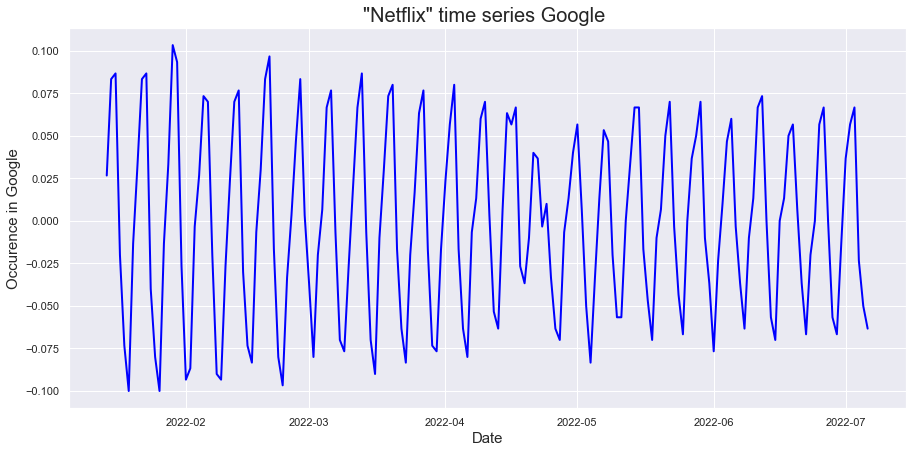

In [115]:
keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Netflix"]
keyWord_of_interest_df = smoothen_timeseries(keyWord_of_interest_df,3)

mask = (keyWord_of_interest_df['date'] > "2022-01-12") & (keyWord_of_interest_df['date'] <= "2022-07-07")
keyWord_of_interest_df = keyWord_of_interest_df.loc[mask]

keyWord_of_interest_df["diff"] = keyWord_of_interest_df["smoothened_normalized_Occurence_in_Google"].diff()

ax = sns.lineplot(x='date', y='diff', data=keyWord_of_interest_df,linewidth=2,color="blue")


plt.title(f"\"Netflix\" time series Google ",fontsize=20)

plt.ylabel('Occurence in Google', fontsize=15);
plt.xlabel('Date', fontsize=15);

sns.set(rc={'figure.figsize':(15,7)})

save_fig(ax,"Netflix_Time_Series_Google_Diff")

## Granger examples

In [22]:
# News granger causes Google
# "Autobahn" Lag: 2

keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Autobahn"]

keyWord_of_interest_df["smoothened_normalized_Occurence_in_Wikipedia_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Wikipedia'].diff()
keyWord_of_interest_df["smoothened_normalized_Occurence_in_News_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_News'].diff()
keyWord_of_interest_df["smoothened_normalized_Occurence_in_Google_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Google'].diff()

sns.set(rc={'figure.figsize':(15,7)})

ax = sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_News_diff', data=keyWord_of_interest_df,linewidth=2,color="blue")
sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_Google_diff', data=keyWord_of_interest_df,linewidth=2,color="red")



plt.title("\"Autobahn\" News granger causes Google",fontsize=20)
plt.ylabel('Occurence', fontsize=15);
plt.xlabel('Date', fontsize=15);
plt.legend(labels=["News","Google",])

save_fig(ax,"Autobahn_Time_Series_News_Google")

KeyError: 'news_Page'

C:\Users\Jan\AppData\Local\Temp\ipykernel_26420\2354869901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["smoothened_normalized_Occurence_in_Wikipedia_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Wikipedia'].diff()
C:\Users\Jan\AppData\Local\Temp\ipykernel_26420\2354869901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["smoothened_normalized_Occurence_in_News_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Ne

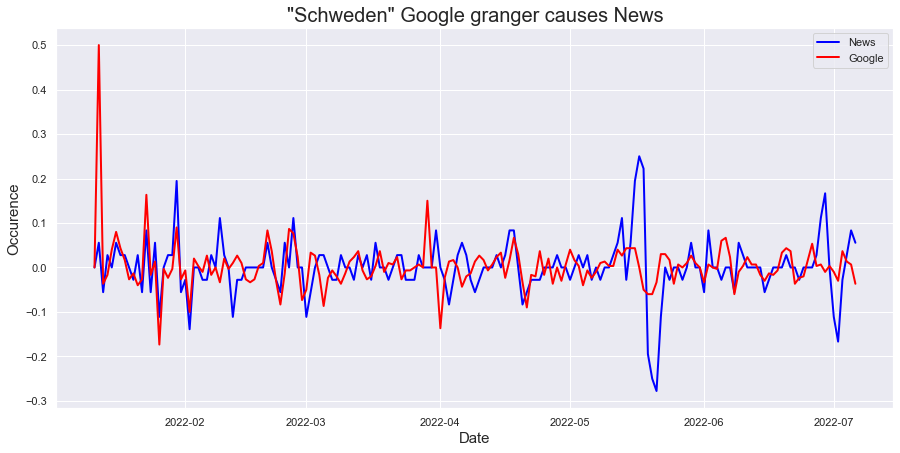

In [13]:
# Google granger causes News
# "Schweden" Lag: 2

keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "Schweden"]

keyWord_of_interest_df["smoothened_normalized_Occurence_in_Wikipedia_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Wikipedia'].diff()
keyWord_of_interest_df["smoothened_normalized_Occurence_in_News_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_News'].diff()
keyWord_of_interest_df["smoothened_normalized_Occurence_in_Google_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Google'].diff()


sns.set(rc={'figure.figsize':(15,7)})

ax = sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_News_diff', data=keyWord_of_interest_df,linewidth=2,color="blue")
sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_Google_diff', data=keyWord_of_interest_df,linewidth=2,color="red")



plt.title("\"Schweden\" Google granger causes News",fontsize=20)
plt.ylabel('Occurence', fontsize=15);
plt.xlabel('Date', fontsize=15);
plt.legend(labels=["News","Google",])

save_fig(ax,"Schweden_Time_Series_Google_News")

C:\Users\Jan\AppData\Local\Temp\ipykernel_26420\1734488480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["smoothened_normalized_Occurence_in_Wikipedia_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Wikipedia'].diff()
C:\Users\Jan\AppData\Local\Temp\ipykernel_26420\1734488480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["smoothened_normalized_Occurence_in_News_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Ne

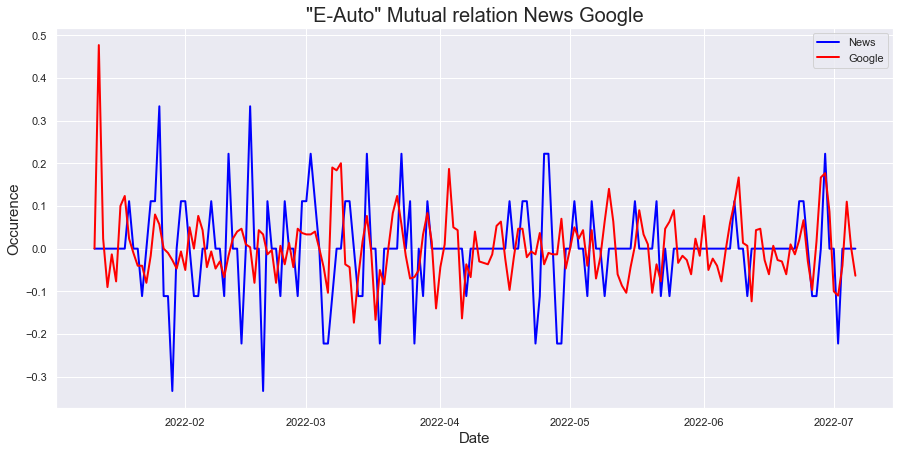

In [18]:
# Mutual relation google news
# "E-Auto" Lag: 2

keyWord_of_interest_df = Occurence_DF.loc[Occurence_DF["KeyWord"] == "E-Auto"]

keyWord_of_interest_df["smoothened_normalized_Occurence_in_Wikipedia_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Wikipedia'].diff()
keyWord_of_interest_df["smoothened_normalized_Occurence_in_News_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_News'].diff()
keyWord_of_interest_df["smoothened_normalized_Occurence_in_Google_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Google'].diff()

sns.set(rc={'figure.figsize':(15,7)})

ax = sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_News_diff', data=keyWord_of_interest_df,linewidth=2,color="blue")
sns.lineplot(x='date', y='smoothened_normalized_Occurence_in_Google_diff', data=keyWord_of_interest_df,linewidth=2,color="red")



plt.title("\"E-Auto\" Mutual relation News Google",fontsize=20)
plt.ylabel('Occurence', fontsize=15);
plt.xlabel('Date', fontsize=15);
plt.legend(labels=["News","Google",])

save_fig(ax,"E_Auto_Time_Series_News_Google_mutual")

In [80]:

def save_fig(ax, path):
    #sns.set(rc={'figure.figsize':(10,2)})
    figure = ax.get_figure()
    figure.savefig(f"C:/Users/Jan/Documents/Python_Projects/Bachelorthesis/Bachelorthesis/Analysis/Plots/Basic Analysis/Occurence Analysis/{path}.png",bbox_inches='tight',dpi=500)

In [41]:
keyWord_of_interest_df = Occurence_DF_Bild.loc[Occurence_DF_Bild["KeyWord"] == "Augsburg"]


keyWord_of_interest_df["smoothened_normalized_Occurence_in_Wikipedia_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Wikipedia'].diff()
keyWord_of_interest_df["smoothened_normalized_Occurence_in_News_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_News'].diff()
keyWord_of_interest_df["smoothened_normalized_Occurence_in_Google_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Google'].diff()

# news granger causes google
keyWord_of_interest_df = keyWord_of_interest_df.fillna(0)
test = grangercausalitytests(keyWord_of_interest_df[["smoothened_normalized_Occurence_in_Google_diff","smoothened_normalized_Occurence_in_News_diff"]],maxlag=7)
test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3198  , p=0.5724  , df_denom=173, df_num=1
ssr based chi2 test:   chi2=0.3254  , p=0.5684  , df=1
likelihood ratio test: chi2=0.3251  , p=0.5686  , df=1
parameter F test:         F=0.3198  , p=0.5724  , df_denom=173, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.9166  , p=0.0033  , df_denom=170, df_num=2
ssr based chi2 test:   chi2=12.1812 , p=0.0023  , df=2
likelihood ratio test: chi2=11.7759 , p=0.0028  , df=2
parameter F test:         F=5.9166  , p=0.0033  , df_denom=170, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.8598  , p=0.0002  , df_denom=167, df_num=3
ssr based chi2 test:   chi2=21.4421 , p=0.0001  , df=3
likelihood ratio test: chi2=20.2203 , p=0.0002  , df=3
parameter F test:         F=6.8598  , p=0.0002  , df_denom=167, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.1508  , p=0.0006  

C:\Users\Jan\AppData\Local\Temp\ipykernel_26420\848607752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["smoothened_normalized_Occurence_in_Wikipedia_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_Wikipedia'].diff()
C:\Users\Jan\AppData\Local\Temp\ipykernel_26420\848607752.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyWord_of_interest_df["smoothened_normalized_Occurence_in_News_diff"] = keyWord_of_interest_df['smoothened_normalized_Occurence_in_News

{1: ({'ssr_ftest': (0.3198467666930078, 0.5724325028631576, 173.0, 1),
   'ssr_chi2test': (0.3253932424160079, 0.568384388540422, 1),
   'lrtest': (0.32509281503098464, 0.5685630043816369, 1),
   'params_ftest': (0.31984676669300616, 0.5724325028631576, 173.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.916561732088661, 0.0032806009515164002, 170.0, 2),
   'ssr_chi2test': (12.181156507241361, 0.0022640993125846156, 2),
   'lrtest': (11.775911939734442, 0.0027726382648966203, 2),
   'params_ftest': (5.916561732088668, 0.0032806009515164002, 170.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.859813372785258, 0.000219157247775975, 167.0, 3),
   'ssr_chi2test': (21.442051380801825, 8.520942184433517e-05, 3),
   'lrtest': (20.220300558190274, 0.00015280035150828748, 3),
   'params_ftest': (6.859813372785264, 0.00021915724777597247, 167.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
 